<a href="https://colab.research.google.com/github/UtkarshRaj130/Advanced_Soybean_Agricultural_Dataset_Analysis/blob/main/Code_Notebooks/03_eda_and_feature_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download Dataset from GitHub - This Repo

In [4]:
!wget https://raw.githubusercontent.com/UtkarshRaj130/Advanced_Soybean_Agricultural_Dataset_Analysis/refs/heads/main/Dataset/3_direct_encoded.csv?token=GHSAT0AAAAAADCATCXMCQTJO3WQUWLKQUZQZ7ZMN2A -O 3_direct_encoded.csv

--2025-04-11 18:47:11--  https://raw.githubusercontent.com/UtkarshRaj130/Advanced_Soybean_Agricultural_Dataset_Analysis/refs/heads/main/Dataset/3_direct_encoded.csv?token=GHSAT0AAAAAADCATCXMCQTJO3WQUWLKQUZQZ7ZMN2A
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9093 (8.9K) [text/plain]
Saving to: ‘3_direct_encoded.csv’

3_direct_encoded.cs 100%[===================>]   8.88K  --.-KB/s    in 0s      

2025-04-11 18:47:11 (67.6 MB/s) - ‘3_direct_encoded.csv’ saved [9093/9093]



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Plant Height (PH)                        108 non-null    float64
 1   Number of Pods (NP)                      108 non-null    float64
 2   Biological Weight (BW)                   108 non-null    int64  
 3   Sugars (Su)                              108 non-null    float64
 4   Relative Water Content in Leaves (RWCL)  108 non-null    float64
 5   ChlorophyllA663                          108 non-null    float64
 6   Chlorophyllb649                          108 non-null    float64
 7   Protein Percentage (PPE)                 108 non-null    float64
 8   Weight of 300 Seeds (W3S)                108 non-null    float64
 9   Leaf Area Index (LAI)                    108 non-null    float64
 10  Seed Yield per Unit Area (SYUA)          108 non-n

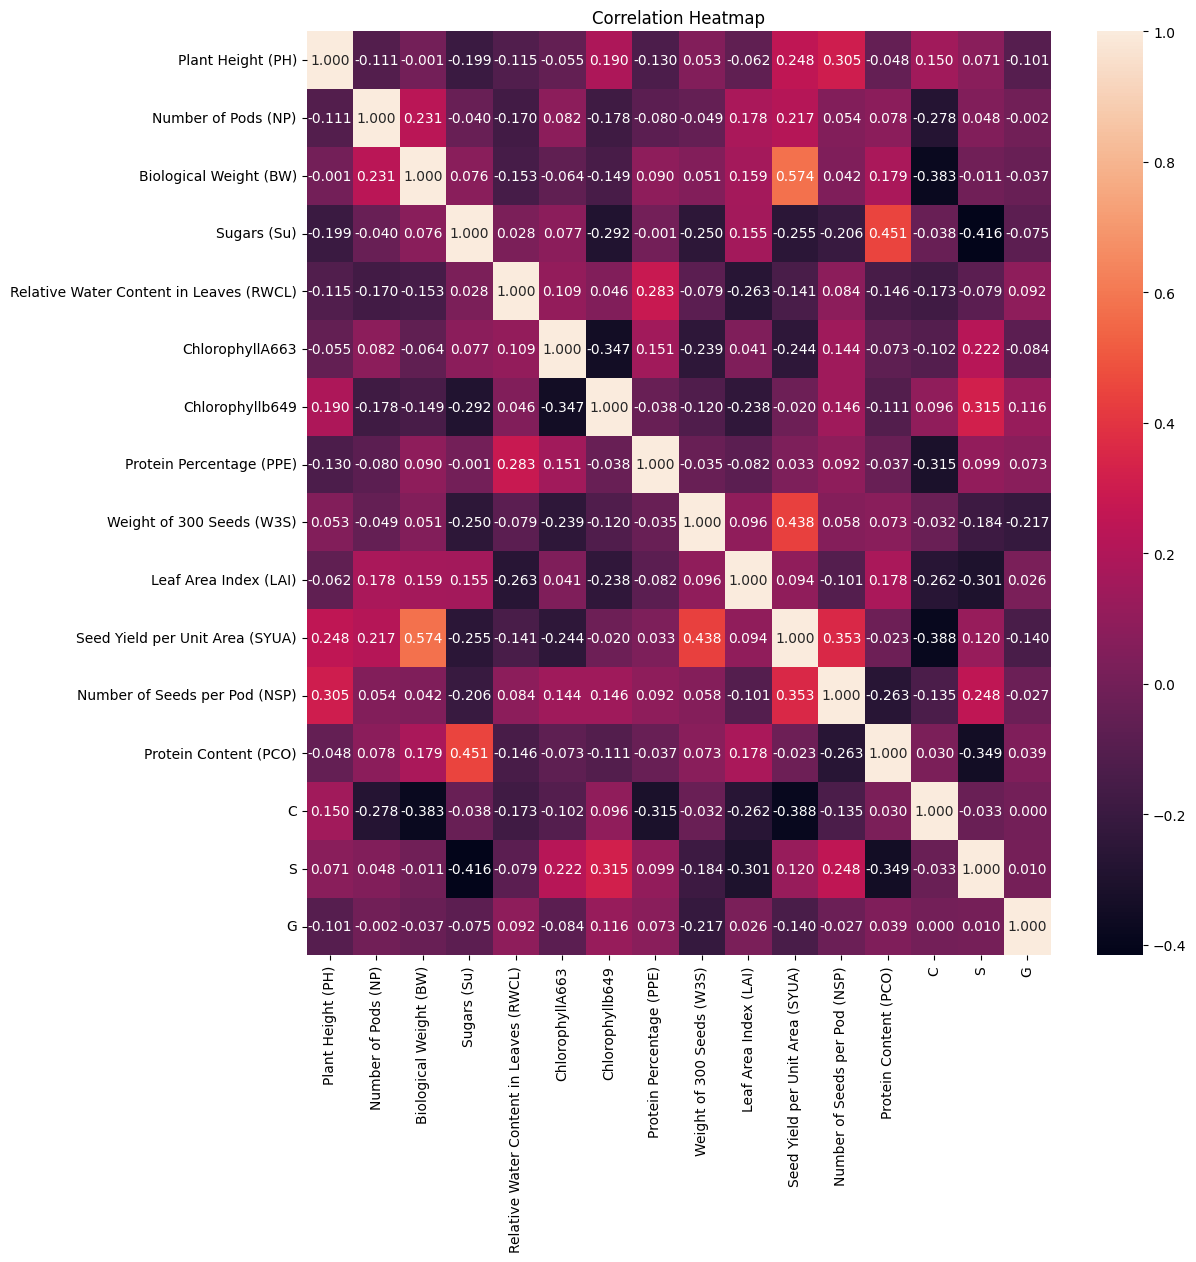

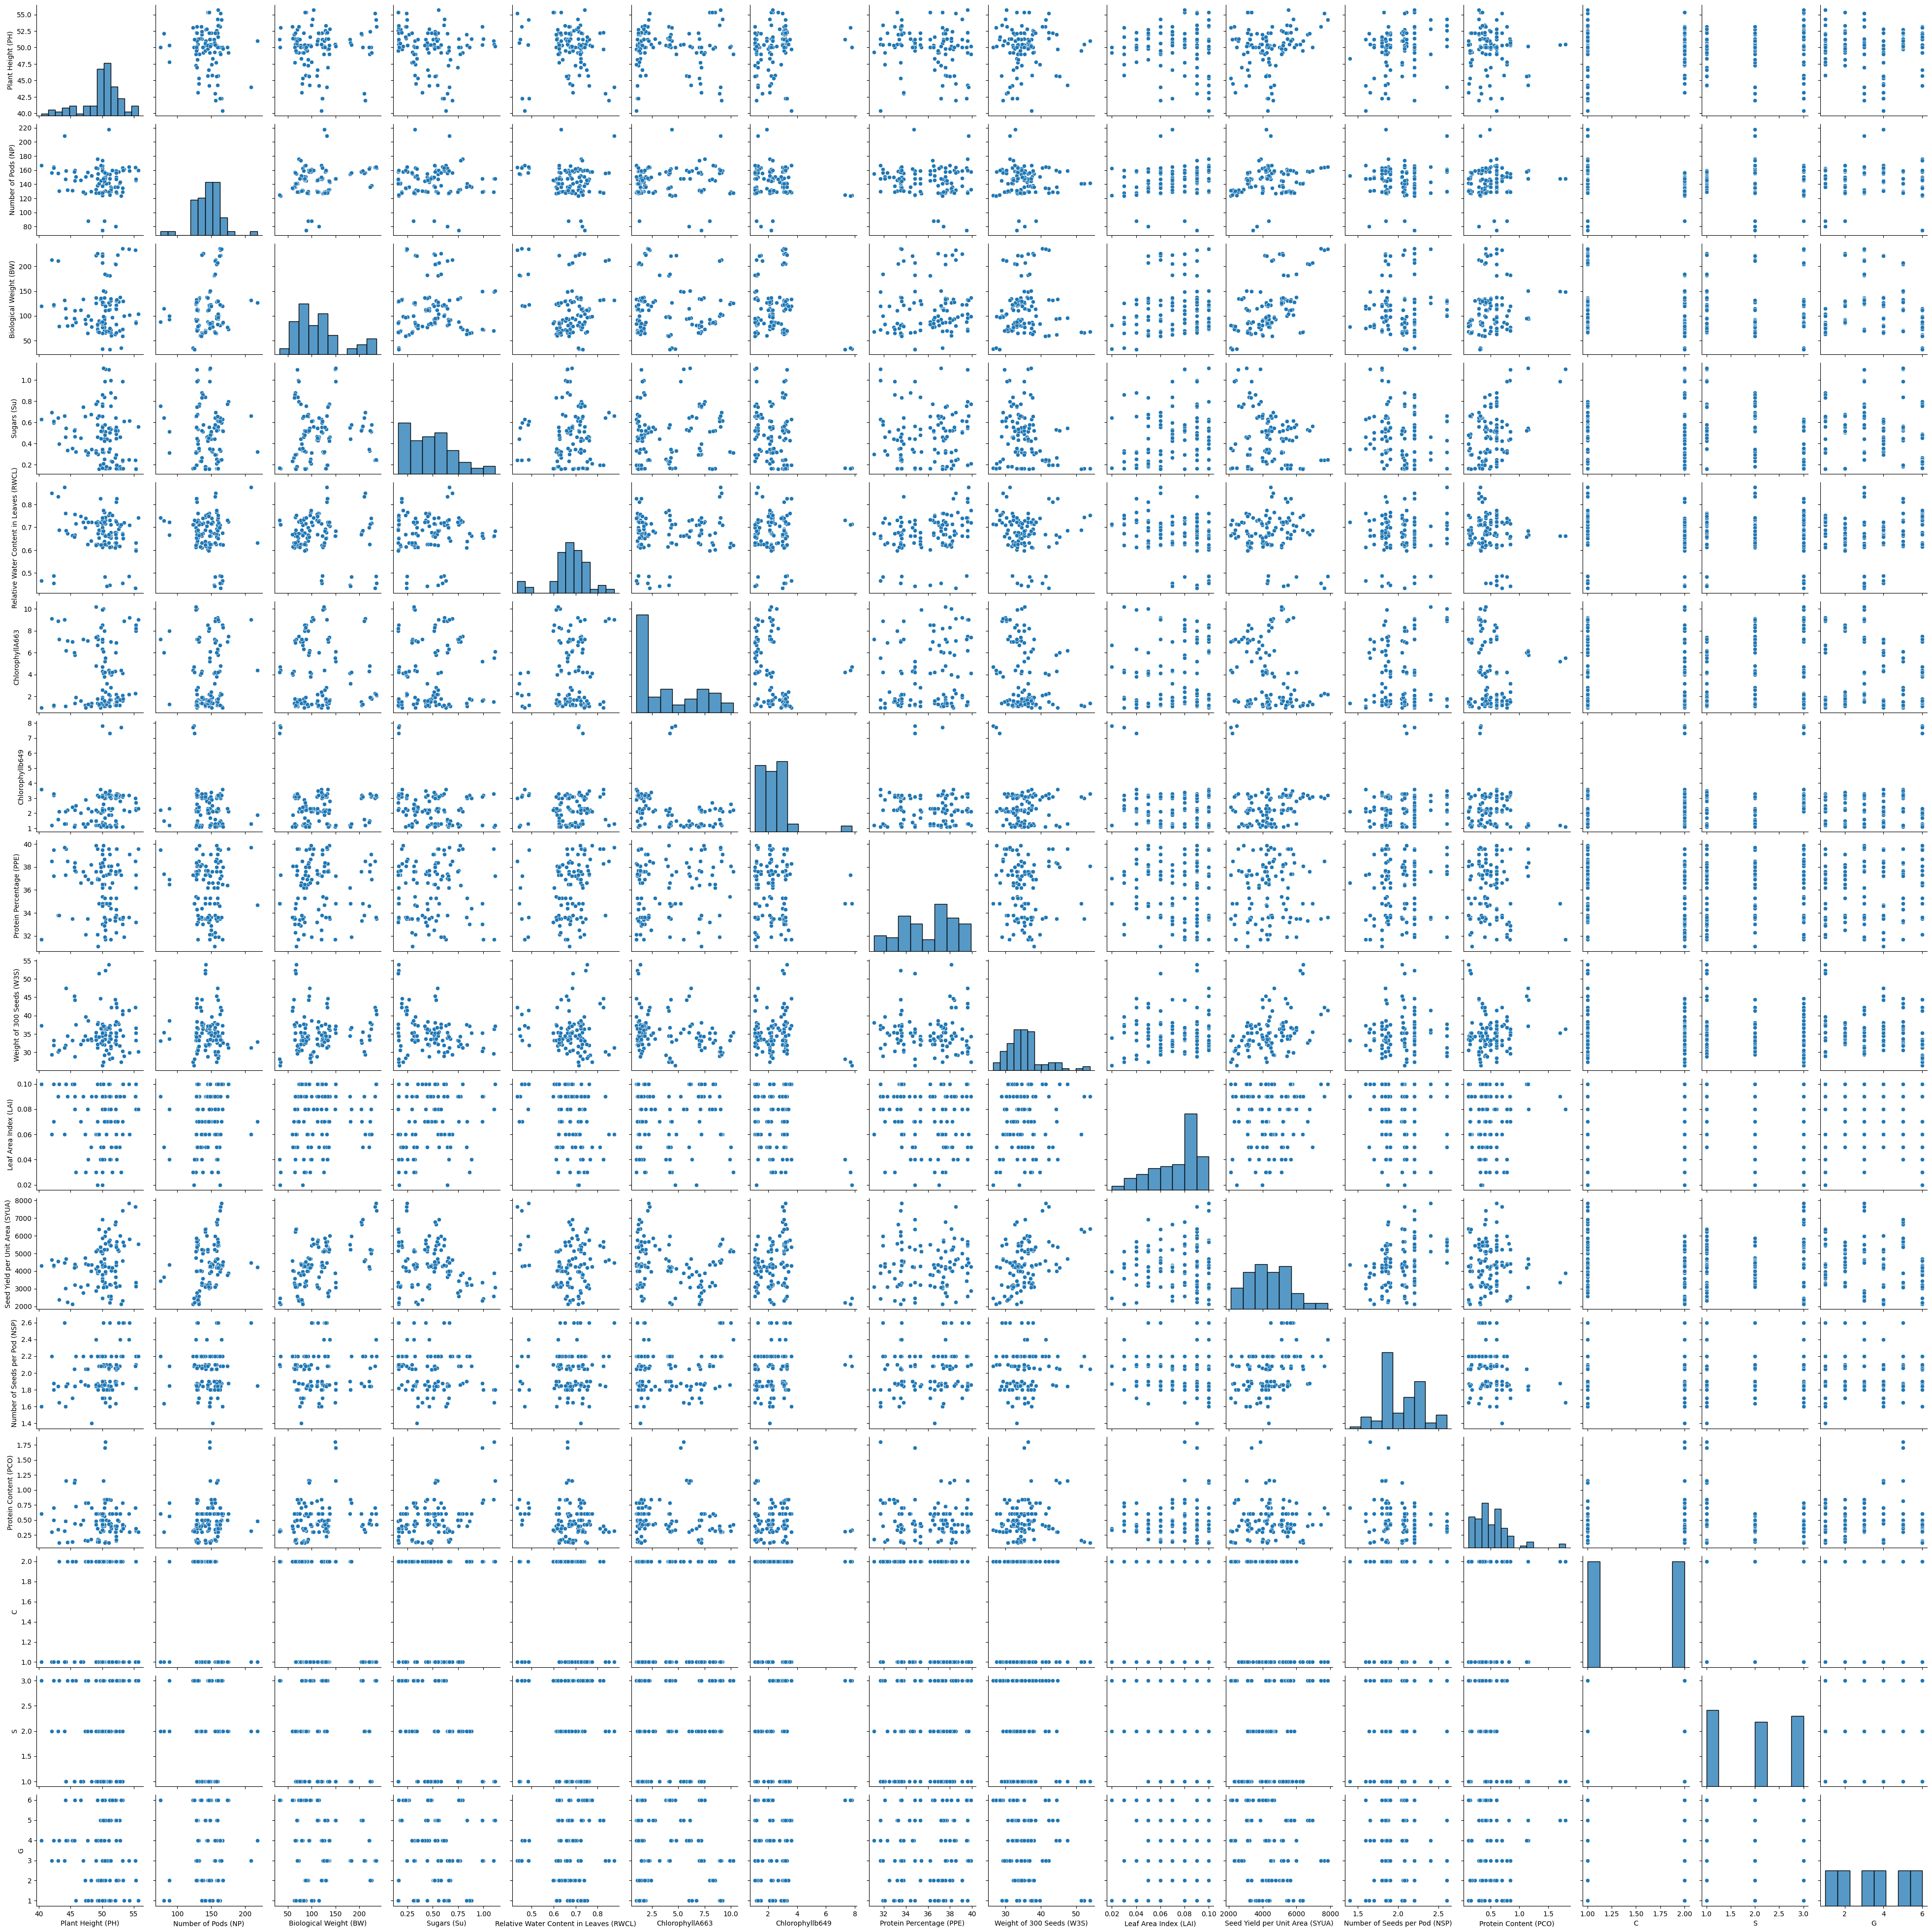

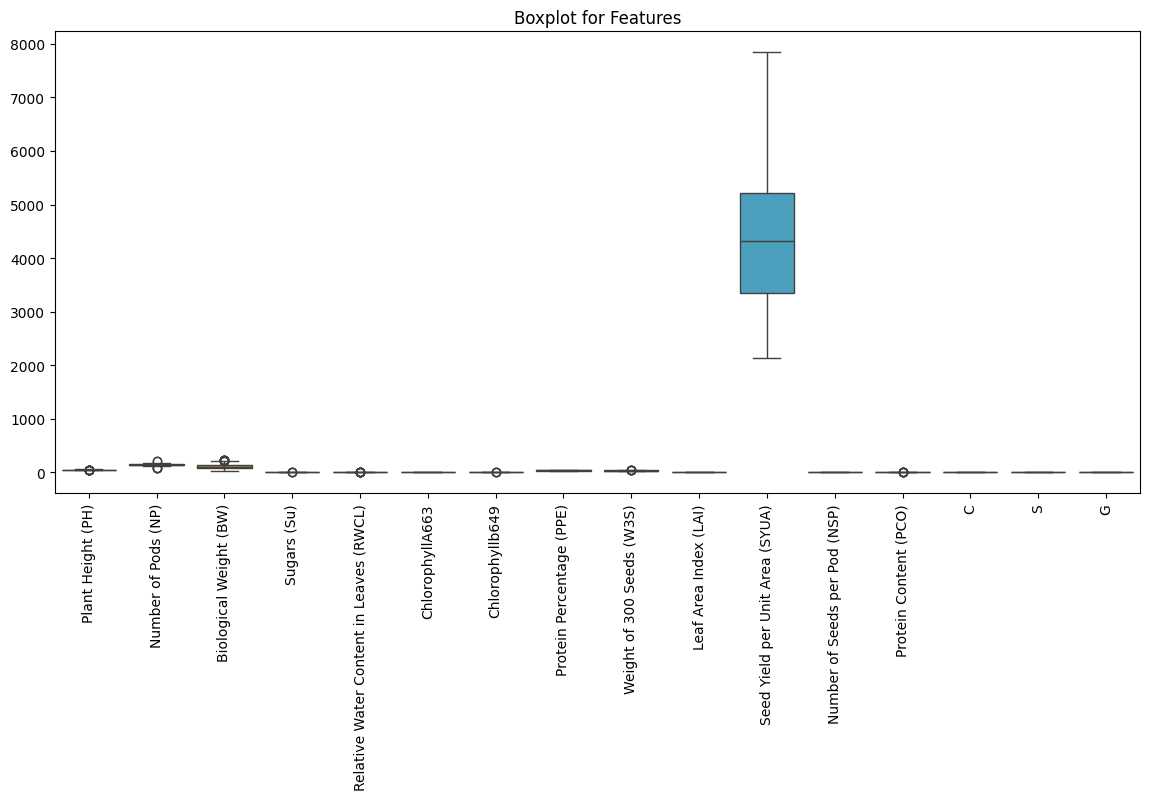

In [9]:
# 📊 EDA and Correlation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

full_data = pd.read_csv('3_direct_encoded.csv')
data_v1 = full_data.iloc[:, 2:]  # Remove ID and Parameters columns

# Basic info
print(data_v1.info())
print(data_v1.describe())

# Heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(data_v1.corr(), annot=True, fmt=".3f")
plt.title("Correlation Heatmap")
plt.show()

# Pairplot
sns.pairplot(data_v1)
plt.show()

# Boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(data=data_v1)
plt.xticks(rotation=90)
plt.title("Boxplot for Features")
plt.show()

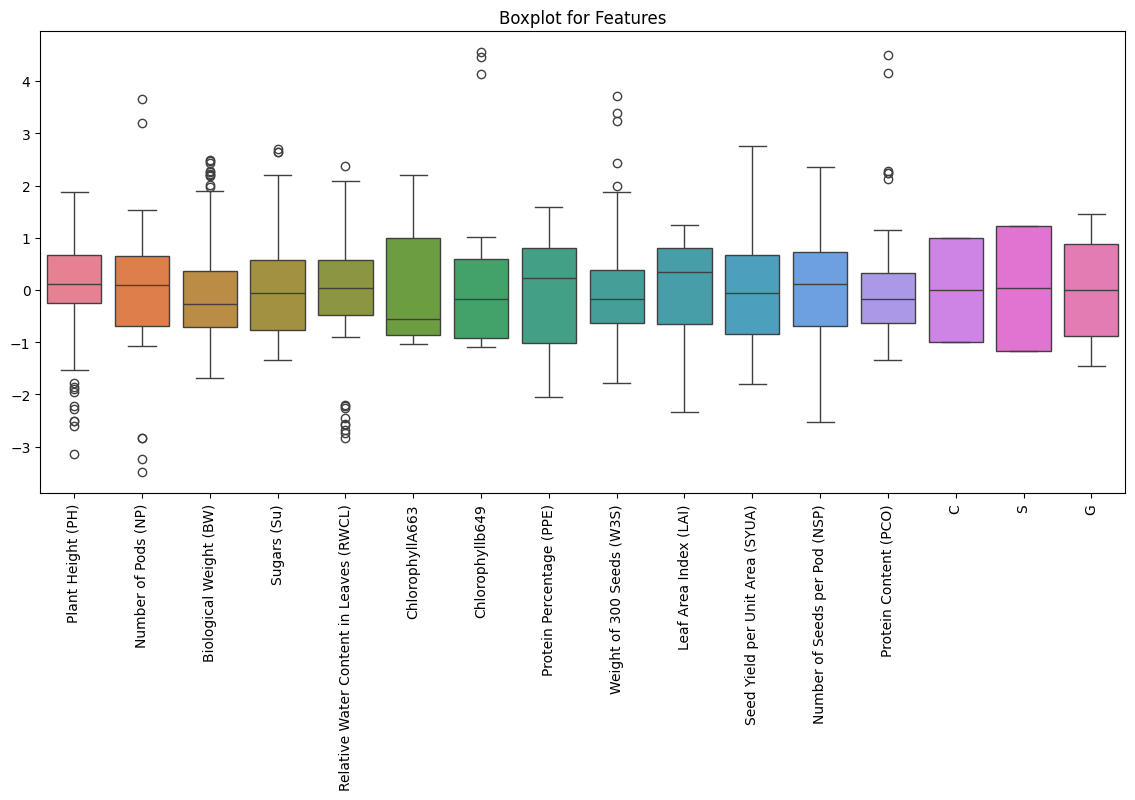

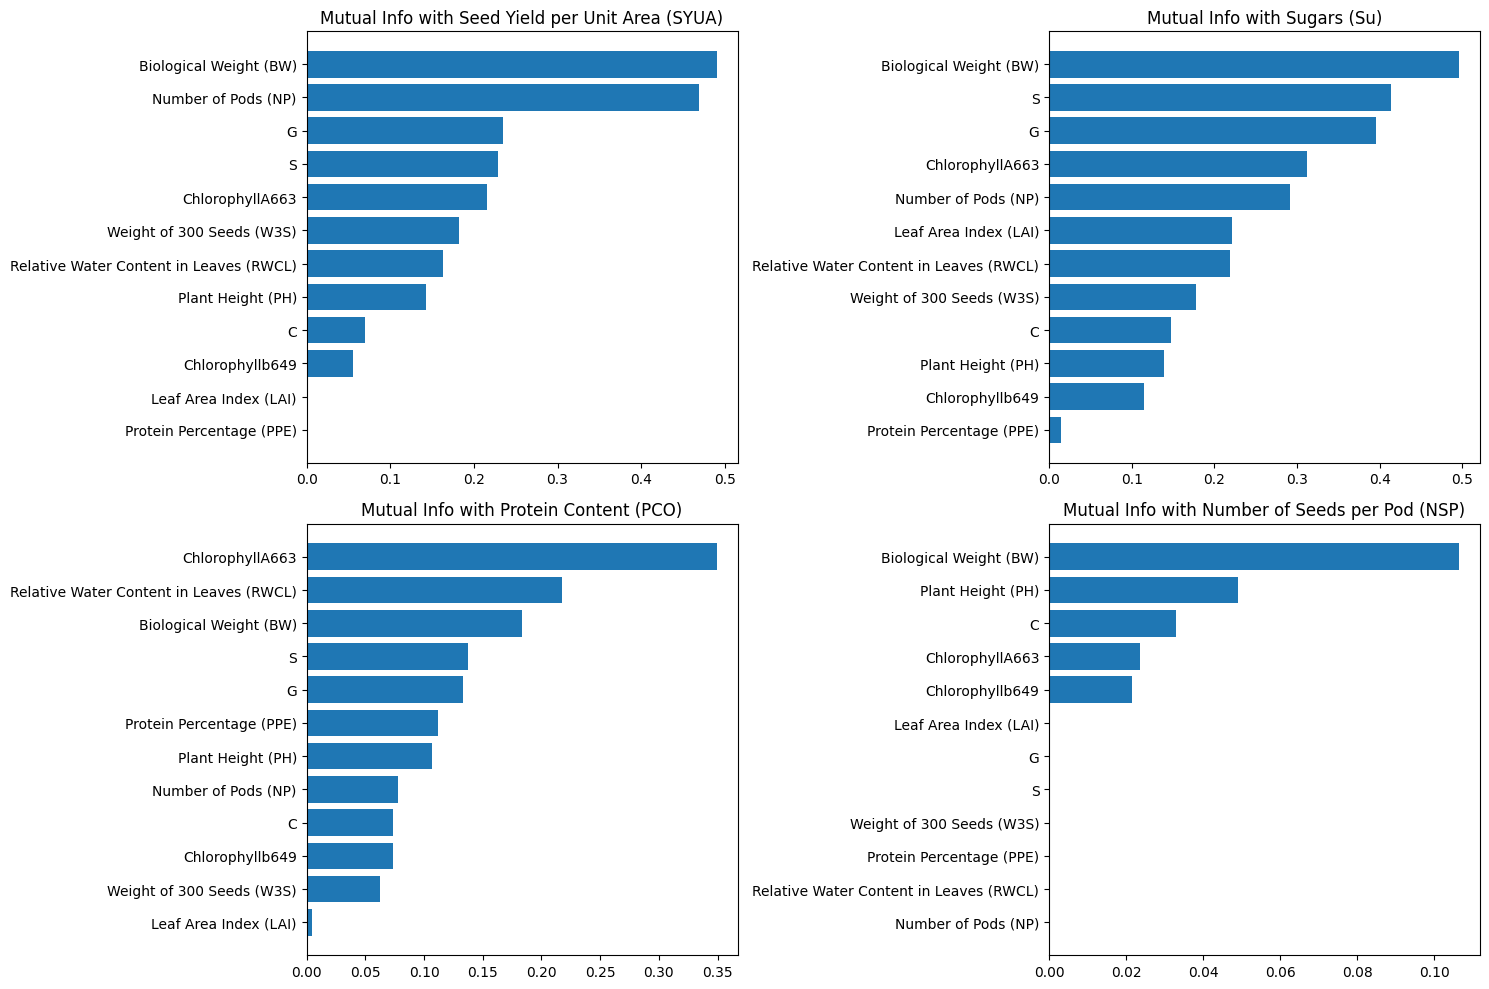

In [10]:
# 📌 Mutual Information Regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
import numpy as np

target_vars = ["Seed Yield per Unit Area (SYUA)", "Sugars (Su)", "Protein Content (PCO)", "Number of Seeds per Pod (NSP)"]

scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_v1), columns=data_v1.columns)
target_frame = data_scaled[target_vars]
features = data_scaled.drop(columns=target_vars)

# Boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(data=data_scaled)
plt.xticks(rotation=90)
plt.title("Boxplot for Features")
plt.show()


mi_scores = {}
for target in target_vars:
    mi = mutual_info_regression(features, data_scaled[target])
    mi_scores[target] = mi

# Plot MI
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
for i, target in enumerate(target_vars):
    sorted_idx = np.argsort(mi_scores[target])[::-1]
    axes[i].barh(features.columns[sorted_idx], np.array(mi_scores[target])[sorted_idx])
    axes[i].set_title(f"Mutual Info with {target}")
    axes[i].invert_yaxis()
plt.tight_layout()
plt.show()
